<a href="https://colab.research.google.com/github/JLMuehlbauer/food-sales-prediction/blob/main/Project_1_food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food Sales Predictions
---
#Project 1: Part 1
Jackson Muehlbauer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading data
filepath = '/content/drive/My Drive/Colab Notebooks/2: Week 2 Pandas/sales_predictions.csv'
df = pd.read_csv(filepath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning

### 1. Number of (Rows, Columns)

In [6]:
# 1. Number of (Rows, Columns)
df.shape

(8523, 12)

### 2. What are the datatypes in each column?

In [7]:
# 2. What are the datatypes in each column?
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicated rows? If so, drop them

In [8]:
# 3. Are there duplicate rows? If so, drop them
df.duplicated().value_counts()

False    8523
dtype: int64

There are no duplicated rows

### 4. Are there missing values?

In [9]:
# 4. Are there missing values?
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Understanding Outlet_Size values
print(df['Outlet_Size'].value_counts())
print(f"NaN {df['Outlet_Size'].isna().sum()}")

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
NaN 2410


### 5. Addressing missing values
---
Item_Weight and Outlet_Size both have missing values...

1. Item_Weight is of dtype float. I assume that it could be a useful column for predictions. The column has around 18% missing values, more than I would want to drop. I will impute the mean in place of the missing values. 

2. Outlet_Size is categorical data (with only 3 unique values) of type string. I also assume this could be a valuable column for predictions. There may also be some key learnings that can be made by keeping this data, thus, I will replace missing values with "missing"

In [11]:
# Filter for missing values
weight_missing = df['Item_Weight'].isna()
mean_weight = df['Item_Weight'].mean()
df.loc[weight_missing, 'Item_Weight'] = mean_weight

# Checking
df['Item_Weight'].isna().sum()

0

In [12]:
# Filling NaN values in Outlet_Size with 'missing'
df['Outlet_Size'].fillna('missing', inplace = True)

# Checking
df['Outlet_Size'].isna().sum()

0

### 6. Confirm there are no missing values

In [13]:
# Confirming that there are no longer missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [14]:
print(df.nunique())
print(df.dtypes)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [15]:
#checking Item_Fat_Content for inconsistencies
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

1. I assume that 'Low Fat', 'LF', and 'low fat' are all the same category. Thus, I will change all values to Low Fat
2. I assume 'Regular' and 'reg' are the same, thus, I will change all values to 'Regular'

In [16]:
# making filters
low_fat = (df['Item_Fat_Content'] == 'LF') | (df['Item_Fat_Content'] == 'low fat')
reg_fat = df['Item_Fat_Content'] == 'reg'

In [17]:
# Using .loc to apply these filters to change the values
df.loc[low_fat, 'Item_Fat_Content'] = 'Low Fat'
df.loc[reg_fat, 'Item_Fat_Content'] = 'Regular'

#Checking that the changes were made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
#checking Item_Type for inconsistencies
print(df['Item_Type'].value_counts())
print('\n')
print(df['Outlet_Identifier'].value_counts())
print('\n')
print(df['Outlet_Size'].value_counts())
print('\n')
print(df['Outlet_Location_Type'].value_counts())
print('\n')
print(df['Outlet_Type'].value_counts())
#checks out

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Medium     2793
missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type,

In [19]:
df.groupby('Item_Type')['Item_Identifier'].nunique().sort_values(ascending = False)

Item_Type
Fruits and Vegetables    220
Snack Foods              220
Household                170
Frozen Foods             155
Dairy                    125
Canned                   120
Baking Goods             119
Health and Hygiene        95
Meat                      80
Soft Drinks               80
Breads                    45
Hard Drinks               40
Others                    30
Starchy Foods             30
Breakfast                 20
Seafood                   10
Name: Item_Identifier, dtype: int64

In [20]:
# If this data is used for a prediction model, the Item_Identifier appears to have far to many unique values to be useful. 
# However, it also can't be used as an indexer because it is not unique (duplicates exist). That said, it does give us the ability to see the number of unique 
# items there are. Thus, I will plan to keep it. 

#df.drop(columns = 'Item_Identifier', inplace = True)
#df.head()

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)


In [21]:
# Summary statistics
df.describe(exclude=[object])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
# Only showing min, max, mean
print(f'Minimum value: \n{df.min(numeric_only = True)}\n')
print(f'Maximum value: \n{df.max(numeric_only = True)}\n')
print(f'Mean value: \n{df.mean(numeric_only = True)}\n')


Minimum value: 
Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64

Maximum value: 
Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

Mean value: 
Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64



##Exploratory Visuals
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.
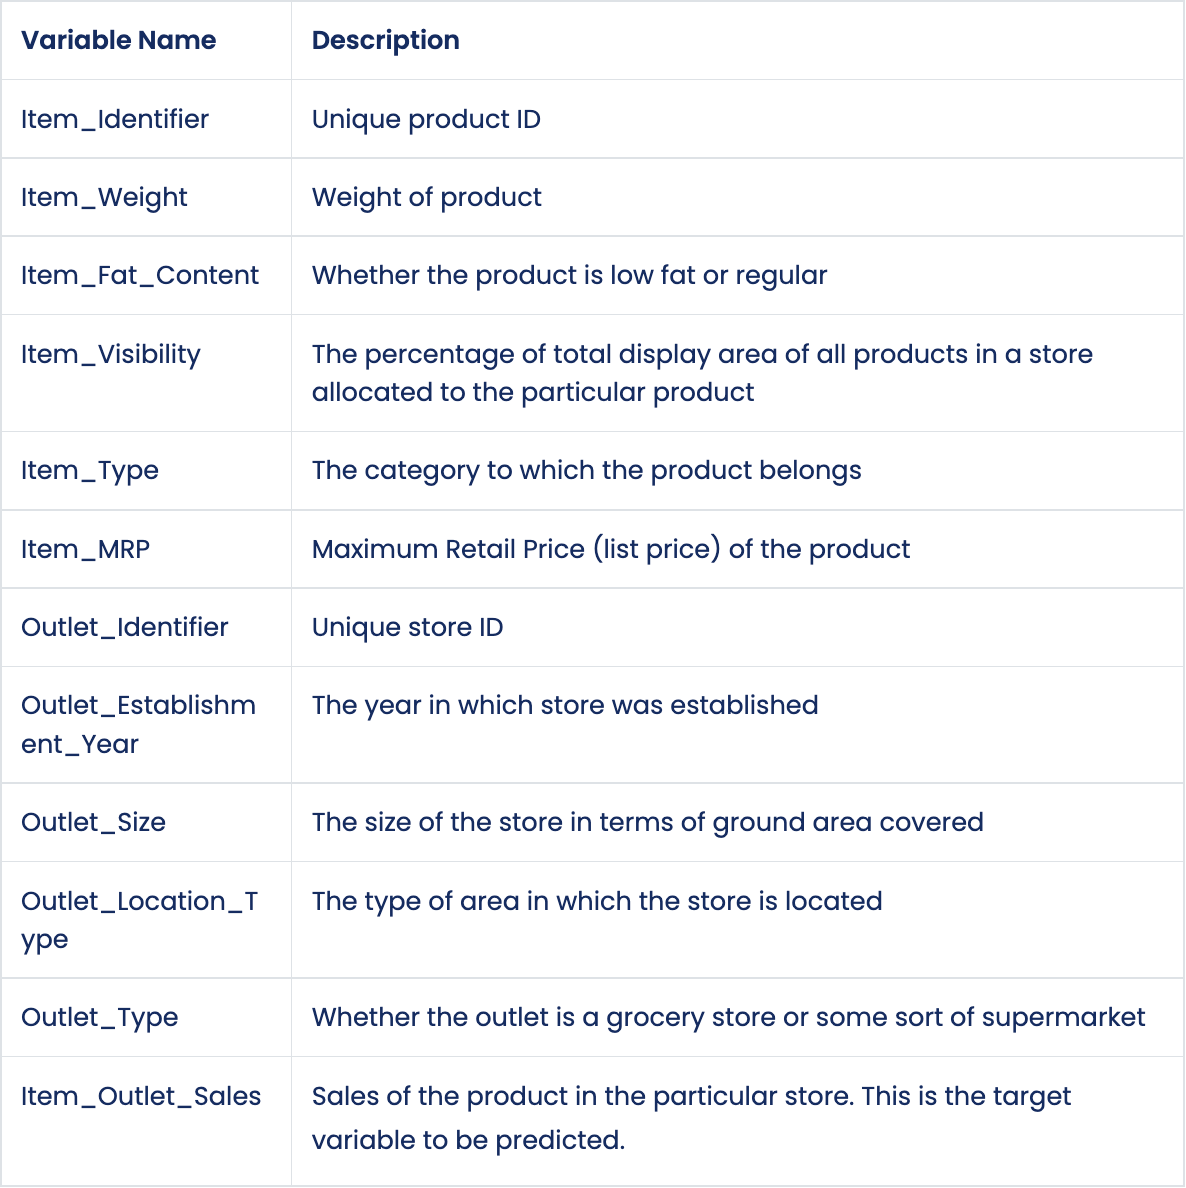


### Exploratory Histograms 
- Item_Weight
- Item_Visibility
- Item_MRP
- Item_Outlet_Sales

In [23]:
df.info()
df.nunique() 
df.head()
# Get a sense of which features make sense to plot as a histogram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


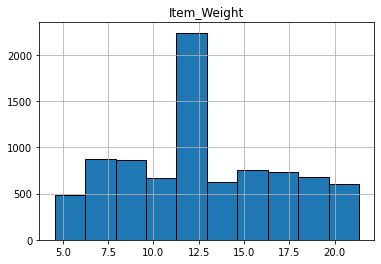

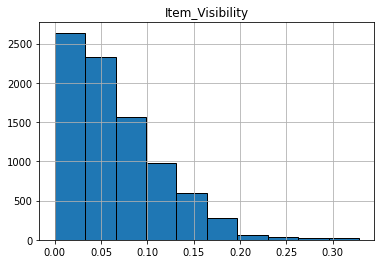

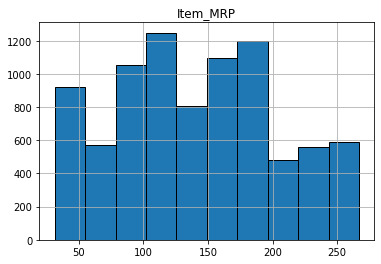

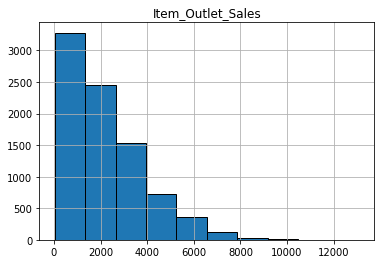

In [24]:
for key in ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']:
  plt.figure();
  df[key].hist(edgecolor = 'black');
  plt.title(key);


#### Observations from histograms
- Item Weight
  - There is a spike in frequency in the middle portion of the histogram. This is a consequence of imputing the mean into the item weight where values were missing.
  - The item weights are very evenly distributed, except for the imputed mean bin
- Item Visibility
  - This feature is very left skewed (most items have very limited visibility)
- Item MRP
  - This feature is mostly randomly distributed
- Item Outlet Sales
  - Is also very left skewed. 
  - It may be interesting to replot this response variable to obtain slightly more information to the bottom end distribution

(<matplotlib.axes._subplots.AxesSubplot at 0x7fda3f32fac0>,)

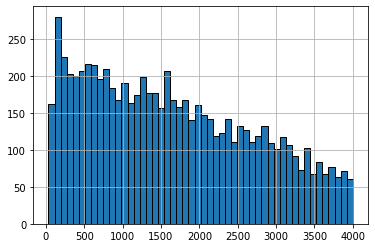

In [25]:
# Filtering and adding bins to the 'Item_Outlet_Sales' histogram.

sales_filter = df['Item_Outlet_Sales'] < 4000
df.loc[sales_filter, 'Item_Outlet_Sales'].hist(bins = 50, edgecolor = 'black'),


Even after subsetting the data by value and adding more bins, this histogram does not show any additional information that the original histogram missed.

### Exploratory Boxplots and Barplots
- Item_Outlet_Sales vs. categorical values
  - Item_Fat_Content
  - Item_Type
  - Outlet_Identifier
  - Outlet_Size
  - Outlet_Location_Type
  - Outlet_Type
  - Outlet_Establishment_Year

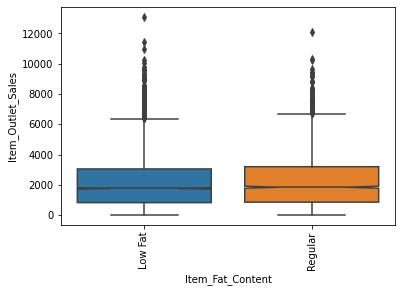

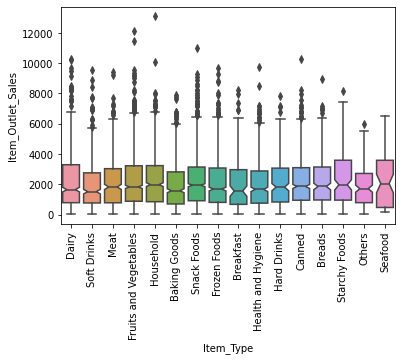

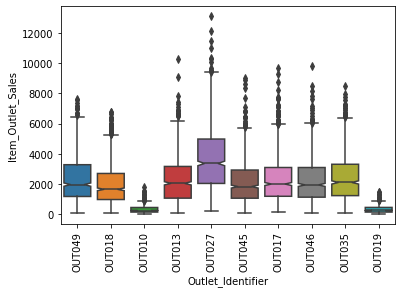

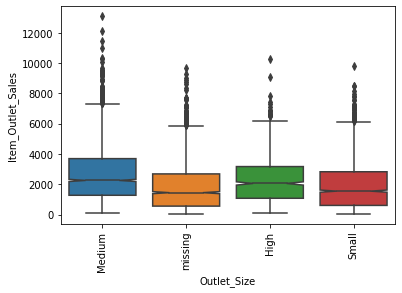

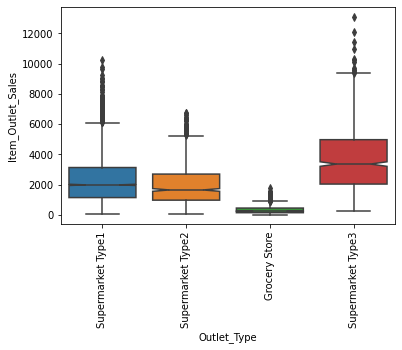

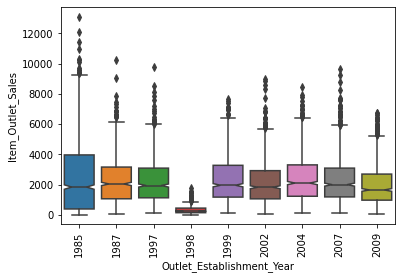

In [26]:
# Making notched boxplots where the response is the Item_Outlet_Sales and the data is binned by the categorical features
for key in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Establishment_Year']: # Getting the list for all the columns that are of type, object and int64 (except Item_Identifier)
  plt.figure();
  sns.boxplot(x = key, y = 'Item_Outlet_Sales', data = df, notch = True);
  plt.xticks(rotation = 90);

#### Key Learnings
1. Item fat content has very little influence on the Item Sales. The notches overlap, indicating that the medians are not statistically different (95% confidence interval)
2. Item type also has little influence on Item Sales
3. The Outlet Identifier plot suggests that certain outlets have a larger ranges of Item outlet sale values than others
4. There appears to be one outlet established in 1998 that has low item sales. I suspect that most of the influence can be attributed to particular outlets. 
5. Grocery stores seems to have the smallest range of Item Sales when compared to the other Outlet Types.



In [27]:
# Making bar plot function to display the counts of the unique entries in the categorical fields
def make_bar(data, x, y):
  '''
  data = pandas dataframe
  x = field name
  y = string for field name
  '''
  fig, ax = plt.subplots()

  # Create a dataframe with the value counts for the specified column, sort descending. 
  counts = data[x].value_counts().sort_values(ascending = False).to_frame()
  
  sns.barplot(data = counts, x = counts.index, y = counts[x], ax=ax)
  plt.xticks(rotation = 90)
  plt.xlabel(f'{y}')
  plt.ylabel(f'Counts for each {y} category')

  return fig, ax

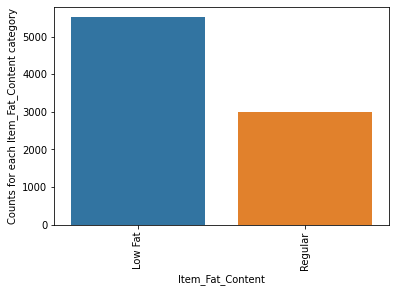

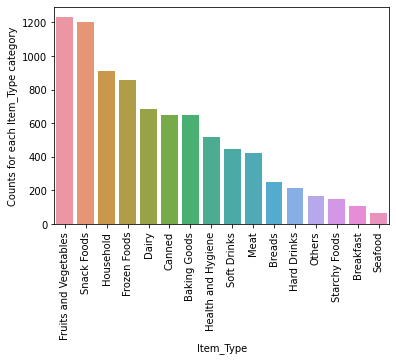

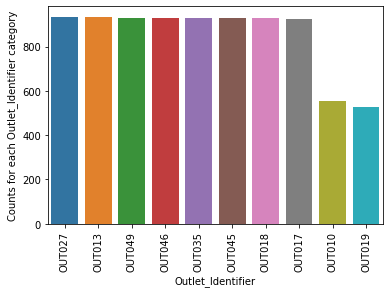

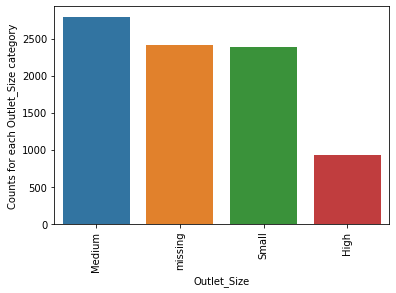

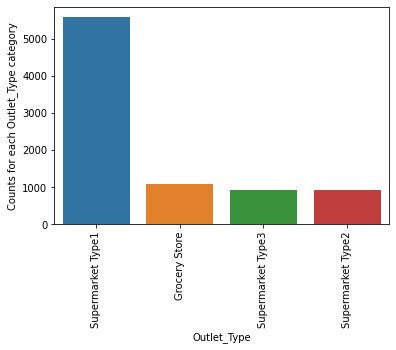

In [28]:
for key in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']:
  fig, ax = make_bar(df, key, key)

#### Key Findings
- There are more instances of low fat entries than regular
- There exists a wide range of frequencies when looking at the Item_Type, there are over 1100 more instances of fruits and vegetables than seafood
- There are many more instances of Supermarket Type1 than the other outlet types. Since rows are an instance of a particular item being sold, this indicates that Supermarket Type1 has a larger selection of available items. 

In [29]:
# Function that will make a barplot of the Item_Outlet_Sales sum grouped by the defined categorical field
def sales_bar(data, x):
  '''
  data = pandas dataframe
  x = categorical column header in dataframe
  '''
  sale_sum = df.groupby(x)['Item_Outlet_Sales'].sum().sort_values(ascending = False).to_frame()
  fig, ax = plt.subplots();
  sns.barplot(data = sale_sum, x = sale_sum.index, y = sale_sum['Item_Outlet_Sales'], ax=ax);
  plt.xticks(rotation = 90);
  return fig, ax

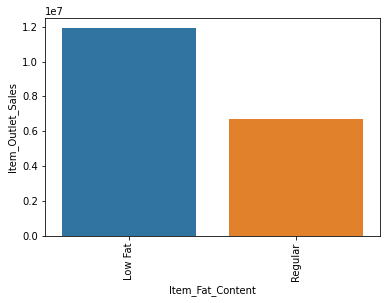

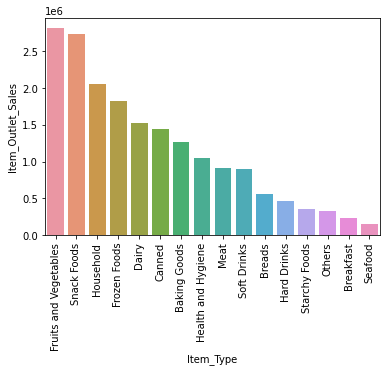

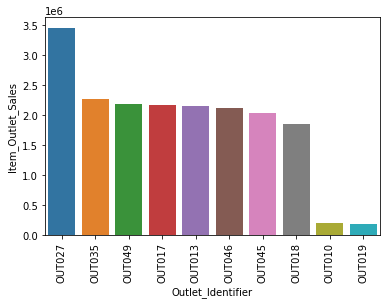

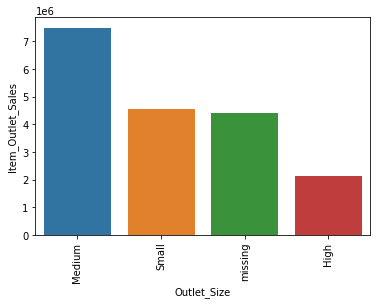

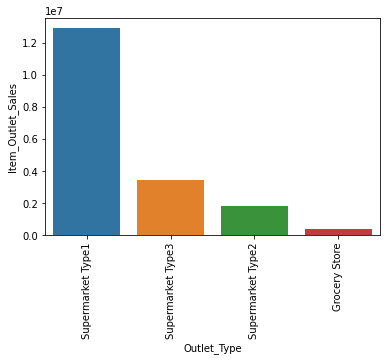

In [30]:
for key in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']:
  fig, ax = sales_bar(df, key)

#### Key Findings
- The grocery store has a much lower sum of sales than the Supermarket Type2 and Type3, despite having more total unique items (as shown in the frequency plot)
- For the most part, the frequency barplots are similar to the summed Item_Outlet_Sales barplots.

### Exploratory Correlation Heatmaps

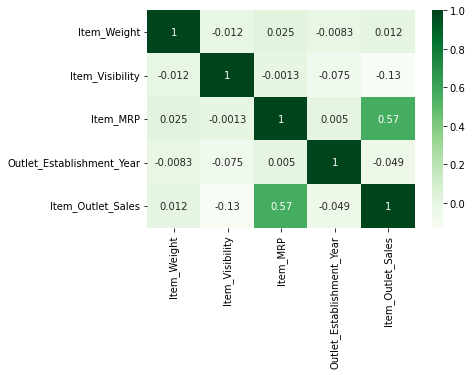

In [31]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

#### Key Findings
- Only the Item_MRP has a moderate correlation to the Item_Outlet_Sales, all other features have little to no correlation between one another.
  - It makes sense that the maximum retail price should influence to the item outlet sale
- There appears to be a slight negative correlation between Item_visibility and Item_Outlet_Sales, which is unexpected. 

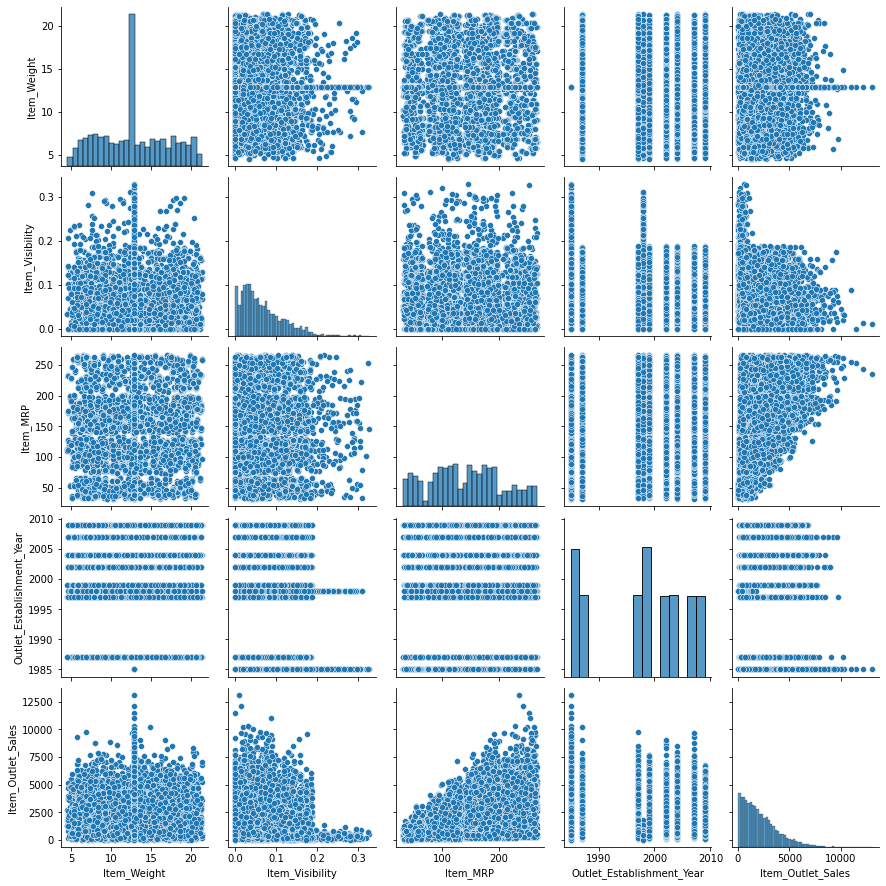

In [32]:
# Pairplot
sns.pairplot(df)

#### Key Findings
- No additional findings to the Heatmap

##Explanatory Visuals


For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- Build on your previous cleaning, exploration, and analysis.
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

### Questions I want to answer:
1. Which outlet type has the highest average item outlet sales?
2. How does the outlet type influence the total Outlet Sales?
3. How does the outlet type influence the total number of sales?

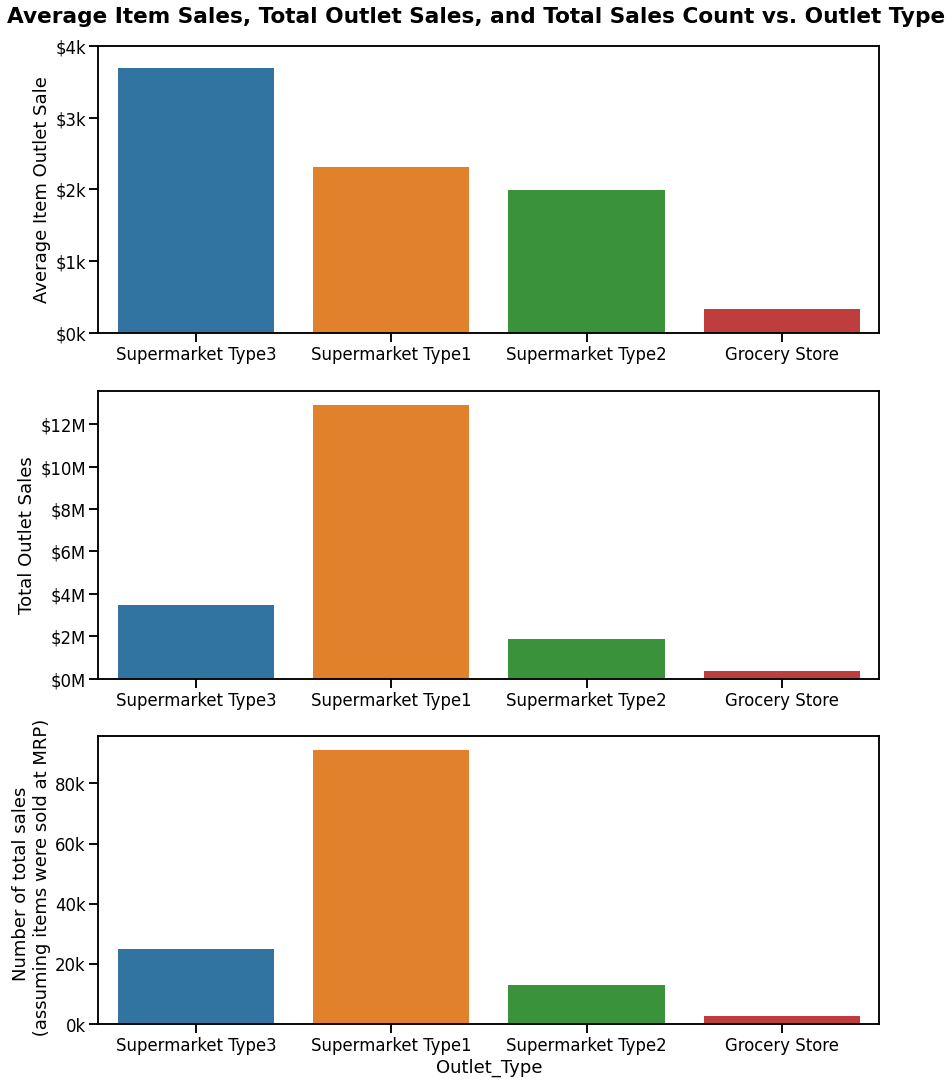

In [57]:
from matplotlib.ticker import FuncFormatter
sns.set_context('talk')

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (14, 18));

sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', order = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).index, ax = axes[0], ci = None);
axes[0].set_ylabel('Average Item Outlet Sale');
axes[0].set_xlabel('')
axes[0].set_yticks([0, 1000, 2000, 3000, 4000])

sale_sum = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().to_frame()
sns.barplot(data = sale_sum, x = sale_sum.index, y = sale_sum['Item_Outlet_Sales'], ax = axes[1], order = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).index);
axes[1].set_ylabel('Total Outlet Sales');
axes[1].set_xlabel('')


df['Sale_Count'] = df['Item_Outlet_Sales']/df['Item_MRP']
sale_count = df.groupby('Outlet_Type')['Sale_Count'].sum().to_frame()
sns.barplot(data = sale_count, x = sale_count.index, y = 'Sale_Count', ax=axes[2], order = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).index);
axes[2].set_ylabel('Number of total sales \n (assuming items were sold at MRP)');


def million_m(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-6:,.0f}M'

price_fmt_1M = FuncFormatter(million_m)

axes[1].yaxis.set_major_formatter(price_fmt_1M)

def one_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}k'

price_fmt_1k = FuncFormatter(one_k)
axes[0].yaxis.set_major_formatter(price_fmt_1k)

def thousand(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'{x*1e-3:,.0f}k'
thousand_fmt = FuncFormatter(thousand)
axes[2].yaxis.set_major_formatter(thousand_fmt)



fig.suptitle('Average Item Sales, Total Outlet Sales, and Total Sales Count vs. Outlet Type', y = 0.91, fontweight = 'bold');


### Interpretation
1. Subplot 1: Supermarket Type3 has the highest average item outlet sales. This indicates that this outlet type sells a higher volume of a given item than the other outlet types. Likewise, Grocery stores sell the lowest volume of any given item. 
2. Subplot 2: Supermarket Type1 has the highest total sales. From subplot 1, we know that the Supermarket Type3 has the highest average item sale, which suggests that Supermarket Type1 has the highest number of unique items.
3. Subplot 3: Supermarket Type1 has the highest number of estimated sales (assuming items were sold at the Maximum Sale Price).

### Recommendation
If you were the supplier of one of the unique items that these outlets carry, you may expect that your item will sell at the highest volume at Supermarket Type3. However, this type of outlet does not make up a large portion of total sales, if this is important, you may want to sell your item at Supermarket Type1 outlets.

### Questions I want to answer:
1. How does Item_MRP influence the Item_Outlet_Sales?

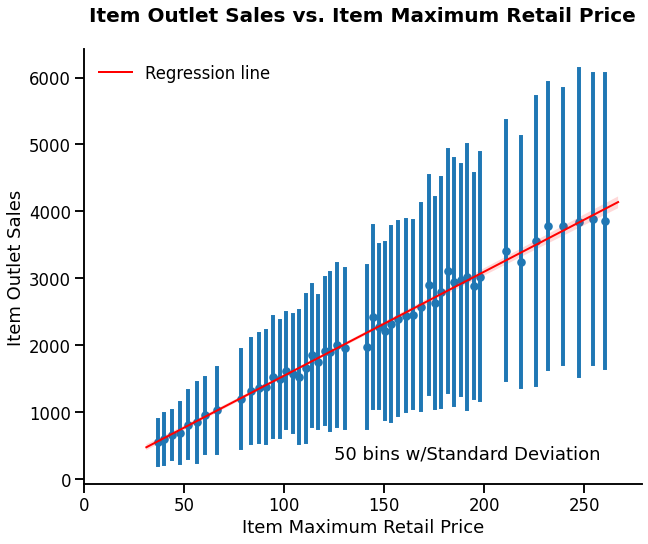

In [106]:
# Plot 'label' : '50 bins w/Standard Deviation'
sns.set_context('talk')

fig, ax = plt.subplots(figsize = (10, 8))

sns.regplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', ax = ax, line_kws={'lw': 2, 'color': 'red', 'label' : 'Regression line'}, fit_reg = True, x_bins = 50, x_ci = 'sd');
ax.set_title('Item Outlet Sales vs. Item Maximum Retail Price', fontsize = 20, fontweight = 'bold', y = 1.05)
ax.set_xlabel('Item Maximum Retail Price')
ax.set_ylabel('Item Outlet Sales')
ax.set_xticks(range(0, 300, 50))
ax.legend(frameon=False)
ax.text(125, 300, '50 bins w/Standard Deviation', fontsize=18, c = 'k');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Interpretation
1. The plot shows a clear positive correlation between the item's maximum retail price and the item's outlet sales. This indicates that as an item's retail price increases, the sales will also increase. 
2. The confidence intervals show that the distribution of the item's outlet sales increases with increasing maximum retail price. This indicates that while a higher retail price averages to a higher dollar amount of sales, there is still a large number of highly priced items that do not result in higher sales. 

### Recommendation
If you are the supplier for one of the unique items sold at the outlets, you should expect that on average you should receive more revenue from the higher priced items. 